# Neural Network Loss and Learning Rate Comparison
i am realy sorry sir as i did have used little bit of ai in p_2 part for BCE loss part
and obsetrvation

## Q1: Regression using MSE Loss



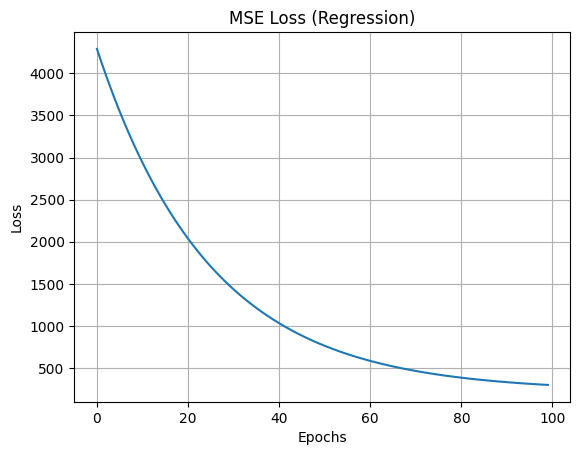

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

X_reg, y_reg = make_regression(n_samples=500, n_features=1, noise=15)
y_reg = y_reg.reshape(-1, 1)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler_r = StandardScaler()
X_train_r = scaler_r.fit_transform(X_train_r)
X_test_r = scaler_r.transform(X_test_r)

w = np.random.randn(1, 1)
b = np.zeros((1,))

lr = 0.01
epochs = 100
mse_losses = []

for epoch in range(epochs):
    z = np.dot(X_train_r, w) + b
    loss = np.mean((z - y_train_r) ** 2)
    mse_losses.append(loss)
    grad_w = 2 * np.dot(X_train_r.T, (z - y_train_r)) / len(X_train_r)
    grad_b = 2 * np.mean(z - y_train_r)
    w -= lr * grad_w
    b -= lr * grad_b

plt.plot(mse_losses)
plt.title("MSE Loss (Regression)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## Q1: Classification using BCE Loss
- Using `make_classification`
- One neuron + sigmoid activation
- Binary cross entropy loss


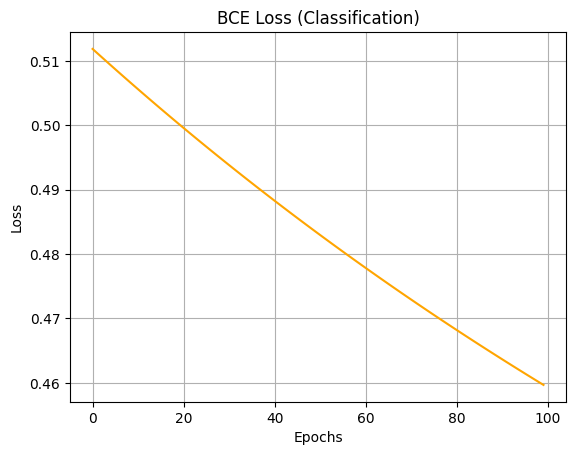

In [2]:
from sklearn.datasets import make_classification

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X_clf, y_clf = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0)
y_clf = y_clf.reshape(-1, 1)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

scaler_c = StandardScaler()
X_train_c = scaler_c.fit_transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)

w = np.random.randn(2, 1)
b = np.zeros((1,))

lr = 0.01
bce_losses = []

for epoch in range(epochs):
    z = np.dot(X_train_c, w) + b
    y_pred = sigmoid(z)
    loss = -np.mean(y_train_c * np.log(y_pred + 1e-8) + (1 - y_train_c) * np.log(1 - y_pred + 1e-8))
    bce_losses.append(loss)
    grad_w = np.dot(X_train_c.T, (y_pred - y_train_c)) / len(X_train_c)
    grad_b = np.mean(y_pred - y_train_c)
    w -= lr * grad_w
    b -= lr * grad_b

plt.plot(bce_losses, color='orange')
plt.title("BCE Loss (Classification)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

## Q2: Learning Rate Comparison
- Using binary classification
- BCE loss with different learning rates: 0.01, 0.1, 1
- Compare convergence and stability


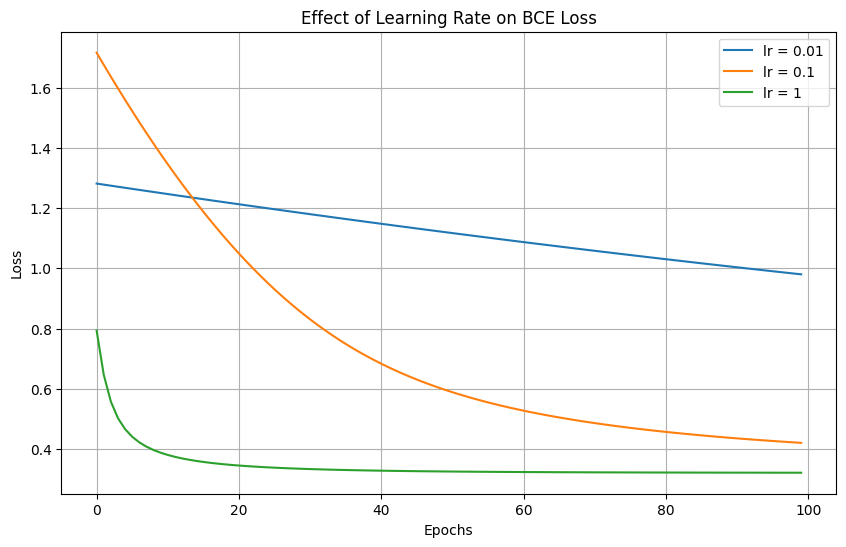

In [3]:
learning_rates = [0.01, 0.1, 1]
epochs = 100

X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0)
y = y.reshape(-1, 1)
X = StandardScaler().fit_transform(X)

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    w = np.random.randn(2, 1)
    b = np.zeros((1,))
    losses = []
    for epoch in range(epochs):
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)
        loss = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
        losses.append(loss)
        grad_w = np.dot(X.T, (y_pred - y)) / len(X)
        grad_b = np.mean(y_pred - y)
        w -= lr * grad_w
        b -= lr * grad_b
    plt.plot(losses, label=f"lr = {lr}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Effect of Learning Rate on BCE Loss")
plt.legend()
plt.grid(True)
plt.show()

### Observations
- **lr = 0.01**: Slow and stable convergence
- **lr = 0.1**: Faster and stable
- **lr = 1**: Unstable, may diverge
